In [25]:
import pandas as pd
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [26]:
class saham():
    def __init__(self, symbol):
      from sklearn.linear_model import LinearRegression
      from sklearn.model_selection import train_test_split
      self.train_test_split = train_test_split
      self.model = LinearRegression()
      self.symbol = symbol
      self.ticker = yf.Ticker(symbol)
      self.info = self.ticker.info
      self.realData = self.ticker.history(period='max')
      data = pd.DataFrame()
      self.data = data.assign(Open=self.realData['Open'], Close=self.realData['Close'], High=self.realData['High'], Low=self.realData['Low'])
      self.data = self.data.dropna()
      x = self.data.drop(['Low'], axis=1)
      y = self.data['Low']
      self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_split(x, y, test_size=0.2)
    def trainingData(self, model = None):
      if model == None:
        model = self.model
      self.model = model
      self.model.fit(self.X_train, self.y_train)
      self.scoreTest = self.model.score(self.X_test, self.y_test)
      self.scoreTrain = self.model.score(self.X_train, self.y_train)
      return "Train: " , self.scoreTrain, "Test: ", self.scoreTest
    def predict(self, open, close, high):
      self.trainingData(model = self.model)
      data = pd.DataFrame()
      data = data.assign(Open=[open], Close=[close], High=[high])
      if isinstance(open, list):
        data = pd.DataFrame({'Open': open, 'Close': close, 'High': high})
      else:
          data = pd.DataFrame({'Open': [open], 'Close': [close], 'High': [high]})
      prediction = self.model.predict(data)
      return prediction
    def chart(self, column = ['Open', 'Close', 'High', 'Low']):
      return self.data[column].plot(figsize=(20,5)).set_title(self.symbol)

shm = saham('^JKSE')


In [27]:
shm.chart(column=['Low'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
shm.trainingData(RandomForestRegressor())

('Train: ', 0.9999941946977228, 'Test: ', 0.9999588049751916)

In [ ]:
open = [shm.X_test['Open']]
close = [shm.X_test['Close']]
high = [shm.X_test['High']]

In [ ]:
high

[Date
 2017-02-28 00:00:00+07:00    5405.790039
 2018-05-03 00:00:00+07:00    5996.485840
 2014-06-25 00:00:00+07:00    4875.023926
 2003-11-17 00:00:00+07:00     609.677979
 1999-09-21 00:00:00+07:00     547.724976
                                 ...     
 2000-06-21 00:00:00+07:00     494.492004
 2010-02-12 00:00:00+07:00    2536.565918
 1993-09-07 00:00:00+07:00     418.059998
 2021-06-09 00:00:00+07:00    6047.475098
 2015-02-24 00:00:00+07:00    5422.439941
 Name: High, Length: 1613, dtype: float64]

In [ ]:
shm.predict(open=[5923.078125, 5923.078125], close=[5923.078125, 5923.078125], high=[5923.078125, 5923.078125])

array([5900.79636719, 5900.79636719])

In [ ]:
shm.X_train['Open']

Date
2021-08-20 00:00:00+07:00    5988.757812
2010-08-04 00:00:00+07:00    2973.853027
1991-08-16 00:00:00+07:00     329.937988
1999-06-17 00:00:00+07:00     662.109009
2015-03-31 00:00:00+07:00    5490.975098
                                ...     
2000-10-11 00:00:00+07:00     412.177002
2010-06-14 00:00:00+07:00    2802.096924
2011-11-17 00:00:00+07:00    3813.726074
2022-07-25 00:00:00+07:00    6887.041992
2000-02-21 00:00:00+07:00     599.572998
Name: Open, Length: 6452, dtype: float64

In [ ]:
shm.X_train["Open"].tolist()

[5988.7578125,
 2973.85302734375,
 329.93798828125,
 662.1090087890625,
 5490.97509765625,
 284.6600036621094,
 342.0820007324219,
 587.8800048828125,
 4976.56787109375,
 1798.3360595703125,
 276.8500061035156,
 6106.61181640625,
 370.4320068359375,
 449.8399963378906,
 502.9599914550781,
 566.72998046875,
 586.1500244140625,
 492.8760070800781,
 389.6820068359375,
 438.3699951171875,
 664.6710205078125,
 5444.041015625,
 1485.7080078125,
 6584.494140625,
 225.3179931640625,
 2745.462890625,
 1062.219970703125,
 5940.78515625,
 394.64300537109375,
 944.0859985351562,
 318.1199951171875,
 472.4100036621094,
 4487.5478515625,
 448.8710021972656,
 1102.501953125,
 4962.953125,
 367.8800048828125,
 5993.376953125,
 487.5199890136719,
 591.6909790039062,
 2480.825927734375,
 435.1499938964844,
 5072.23291015625,
 4473.8779296875,
 312.07000732421875,
 463.0400085449219,
 6375.03076171875,
 1286.6929931640625,
 551.052978515625,
 280.3900146484375,
 1242.593994140625,
 6665.71923828125,
 534

In [ ]:
prediction = shm.predict(open = shm.X_train['Open'].tolist(), close= shm.X_train['Close'].tolist(), high= shm.X_train['High'].tolist())
prediction

array([5983.60500735, 2956.83645198,  327.61323941, ..., 3784.26146323,
       6831.19486899,  590.90442705])

In [49]:
import requests

url = 'http://localhost:5000/aapl/predict'
data = {
    'open': 1000,
    'close': 1100,
    'high': 1200
}

response = requests.post(url, data=data)
print(response.text)

[975.75250266]




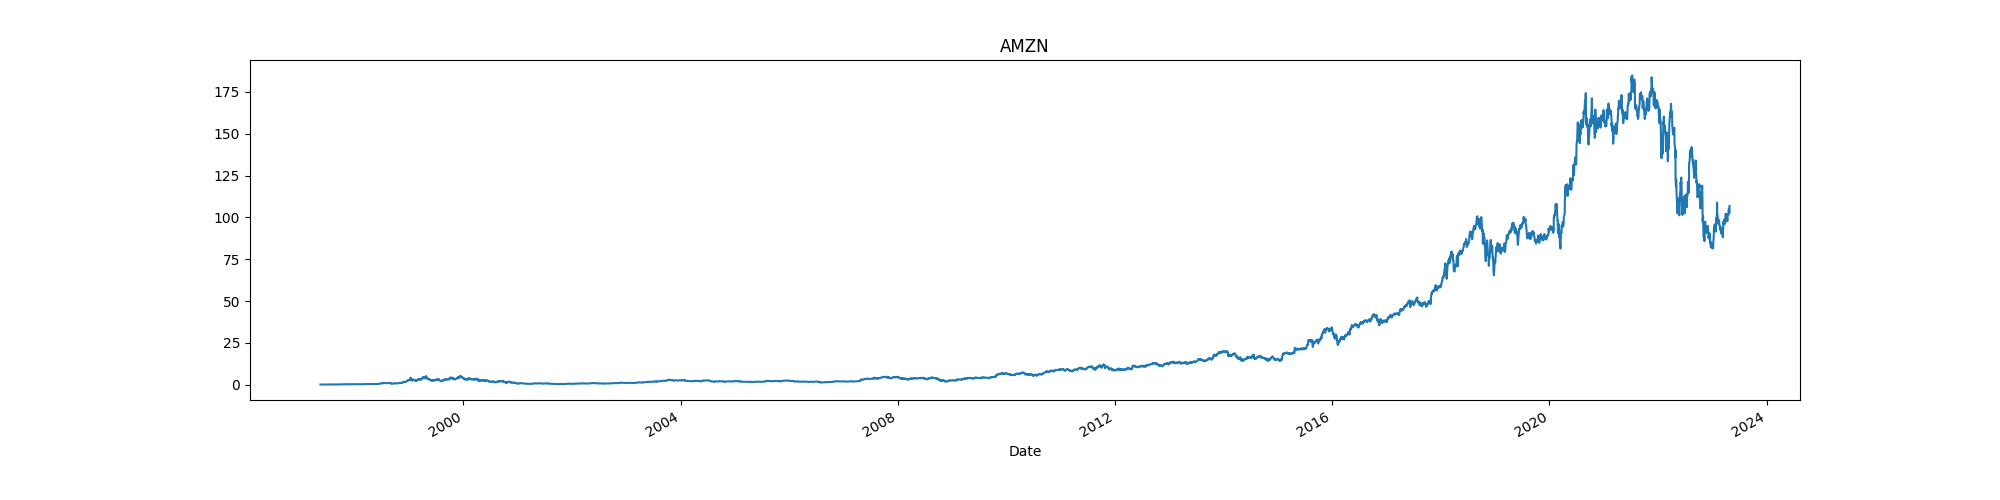

In [8]:
import requests

url = 'http://localhost:5000/AMZN/chart'

response = requests.post(url, data={'column': 'Low'})
print(response.text)